## ML Test - Apollo Solutions
**Name:** Matheus Dantas Pereira

In [160]:
# Imports:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Retrieving Data and Exploration:

In [161]:
# Loading data from pickle file:
pickle_file_path = 'mini_gm_public_v0.1.p'

# Open the pickle file in read-binary mode:
with open(pickle_file_path, 'rb') as file:
    # Load the data from the pickle file
    data = pickle.load(file)

# -	The structure of the dictionary saved in the pickle file:
# {'syndrome_id': { 'subject_id': {'image_id': [320x1 encoding]}}}

# Let's get all syndrome ids by checking data keys:
syndrome_ids = [synd_id for synd_id in data.keys()]

print('Syndrome ids:', syndrome_ids)

Syndrome ids: ['300000082', '300000080', '700018215', '100610883', '100180860', '300000018', '100192430', '300000034', '100610443', '300000007']


In [162]:
# Let's take one image as example to visualize.
# First let's get all syndrome subjects from syndrome id 0:
syndrome_subjects = [synd_sub for synd_sub in data[syndrome_ids[0]].keys()]

print('Syndrome 300000082 subjects:', syndrome_subjects)

Syndrome 300000082 subjects: ['595', '2638', '734490', '2770', '2642', '739644', '729196', '1314', '111', '739643', '739887', '739886', '739884', '739883', '735915', '170', '5902', '794', '2643', '739860', '738912', '738913', '735203', '738911', '2644', '926', '739596', '182', '183', '5906', '547', '739874', '5905', '735911', '5908', '739880', '728931', '728930', '728932', '738909', '203', '2768', '5903', '992', '2763', '2762', '2761', '2760', '2767', '2766', '2765', '2764', '734488', '734489', '2641', '738908', '2646', '921', '5907', '162', '105', '964', '965', '739878', '901', '739879', '729195', '750722', '738903', '738905', '738904', '739861', '2757', '5904', '754643', '728928', '728929', '728927', '738758', '1458', '738910', '2758', '2759']


In [163]:
# Let's check imgs ids:
imgs = data['300000082']['595']

for img_id in imgs.keys():
    print('Img id:', img_id)

Img id: 3543


In [164]:
# Retrieve the img:
example_img = data['300000082']['595']['3543']

# Img is encoded as a 1D vector of 320x1
print('Img Shape:', example_img.shape)

Img Shape: (320,)


In [165]:
# Let's organize data in a set with imgs and correspondent Syndrome Ids:
organized_data = []

for syndrome_id, value in data.items():
    for subject_id, img_id in value.items():
        for id, img in img_id.items():
            organized_data.append([syndrome_id, subject_id, id, np.array(img)])

# Convert it to pandas dataframe and visualize:
data_df = pd.DataFrame(organized_data)
data_df.columns = ['syndrome_id', 'subject_id', 'img_id','img']
data_df.head()

,syndrome_id,subject_id,img_id,img
0,300000082,595,3543,"[-0.03718013, 1.741486, 1.2061033, -0.45145318..."
1,300000082,2638,1633,"[2.4249947, 0.17991967, 2.9503245, 0.37993023,..."
2,300000082,734490,742992,"[-1.7893314, -0.21621145, 0.43431538, -0.55232..."
3,300000082,2770,1812,"[-1.1436926, -0.7146209, 0.31948757, 0.4556819..."
4,300000082,2642,1801,"[0.81417066, 1.3274913, 0.84728503, -0.2123311..."


In [166]:
# Let's Drop the irrelevant data and keep our inputs (imgs) and outputs (syndrome ids):
data_df.drop(columns=['subject_id', 'subject_id', 'img_id'], inplace=True)
data_df.head()

,syndrome_id,img
0,300000082,"[-0.03718013, 1.741486, 1.2061033, -0.45145318..."
1,300000082,"[2.4249947, 0.17991967, 2.9503245, 0.37993023,..."
2,300000082,"[-1.7893314, -0.21621145, 0.43431538, -0.55232..."
3,300000082,"[-1.1436926, -0.7146209, 0.31948757, 0.4556819..."
4,300000082,"[0.81417066, 1.3274913, 0.84728503, -0.2123311..."


### a)	Plotting t-SNE of the inputs, explaining the statistics and the data:

t-SNE, which stands for t-Distributed Stochastic Neighbor Embedding, is a popular technique in machine learning and data visualization for reducing the dimensionality of high-dimensional data while preserving its structure and relationships.

In [167]:
# Importing TSNE:
from sklearn.manifold import TSNE

### Apply t-SNE for dimensionality reduction:

**Let's use n_components as 2 and 3** as a good default as we are dealing with an img, and we are able to visualize.

Perplexity is a hyperparameter in t-SNE that balances the local and global aspects of the data.
It determines the effective number of neighbors that each point is compared to during optimization.
Perplexity should typically be set between 5 and 50.

A lower perplexity value places more emphasis on local relationships, while a higher perplexity value considers more global relationships.
It's recommended to try a range of perplexity values and evaluate the resulting visualizations to determine the most suitable value.
Common choices for perplexity include values like 5, 10, 20, 30, and 50, **let's check 10, 30 and 50 as it's values.**
random_state=42 as Douglas Adams would advise so.

In [168]:
# Define t-sne for n_components=2:
tsne_10 = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_30 = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_50 = TSNE(n_components=2, perplexity=50, random_state=42)

In [169]:
# Let's apply it to our data:
data_tsne_10 = tsne_10.fit_transform(np.array(data_df['img'].tolist()))
data_tsne_30 = tsne_30.fit_transform(np.array(data_df['img'].tolist()))
data_tsne_50 = tsne_50.fit_transform(np.array(data_df['img'].tolist()))

Colors: {'300000082': [1, 0, 0], '300000080': [1, 0, 0], '700018215': [0, 0, 1], '100610883': [0, 0, 1], '100180860': [0, 0, 0], '300000018': [0, 1, 1], '100192430': [0, 0, 0], '300000034': [1, 1, 1], '100610443': [1, 1, 0], '300000007': [1, 0, 0]}


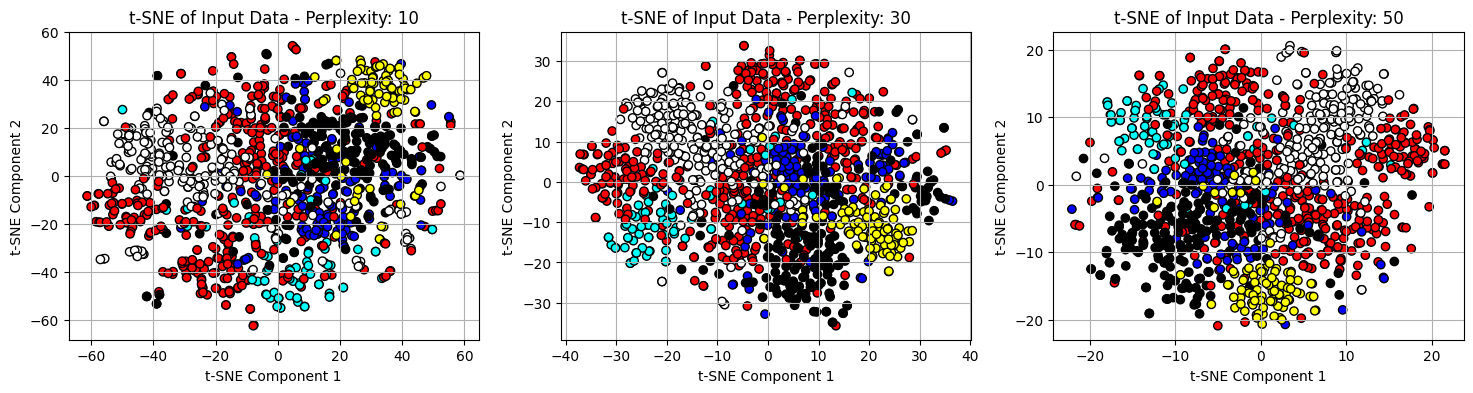

In [170]:
# Plot the t-SNE of img data:
fig, axes = plt.subplots(1,3, figsize=(18, 4))
perplexity = [10, 30, 50]

# Let's get some colors for each unique syndrome:
import random
colors = {syndrome_id:[random.randint(0,1), random.randint(0,1), random.randint(0,1)] for syndrome_id in data_df['syndrome_id'].unique()}
print('Colors:', colors)

# Get colors for each instance of data:
data_colors = [colors[syndrome_id] for syndrome_id in data_df['syndrome_id']]

# Plotting data:
for i, data in enumerate([data_tsne_10, data_tsne_30, data_tsne_50]):
    axes[i].scatter(data[:, 0], data[:, 1], marker='o', c=data_colors, edgecolor='k')
    axes[i].set_title(f't-SNE of Input Data - Perplexity: {perplexity[i]}')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')
    axes[i].grid(True)

plt.show()

### b)	Do a 10 fold cross validation for the following steps:
-	Calculate cosine distance from each test set vector to the gallery vectors
-	Calculate euclidean distance from each test set vector to the gallery vectors
-	Classify each image (vector) or each subject to syndrome Ids based on KNN algorithm for both cosine and euclidean distances.


In [177]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

# Etract Input X and output y data:
X_data = np.array(data_df['img'].tolist(), dtype=np.int32)
y_data = data_df['syndrome_id']

# Let's encode our syndrome_id strings data:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)
y_data = y_data.reshape(-1,1)

# Visualize encoding:
label_encoded_dict = {label: encoded for label, encoded in zip(encoder.classes_, encoder.transform(encoder.classes_))}
print('Encoded Classes:', label_encoded_dict)

Encoded Classes: {'100180860': 0, '100192430': 1, '100610443': 2, '100610883': 3, '300000007': 4, '300000018': 5, '300000034': 6, '300000080': 7, '300000082': 8, '700018215': 9}


### KNN Training:

In [172]:
# OneVsRestClassifier will avoid some issues with multiclass labeling in scikit-learn
# This approach is often used when the native classifier supports only binary classification
# and it's needed to apply to multi-class classification. 
from sklearn.multiclass import OneVsRestClassifier

# Instances of KNN, Let's use n_neighbors=15 after some testing.
knn_cosine = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=15))
knn_euclidean = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=15))

# Import Evaluation Metrics:
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve, auc

# Initialize variables to store values for each distance metric:
cosine_accuracies = []
cosine_f1_scores = []
euclidean_accuracies = []
euclidean_f1_scores = []
cosine_roc_aucs = []
euclidean_roc_aucs = []

# Define the number of folds as 10 for cross-validation.
# Let's use stratified to keep class balance:
kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold = 0

# Performing 10-fold cross-validation:
for train_index, test_index in kfolds.split(X_data, y_data):

    # Get fold data by index:
    X_train_fold, X_test_fold = X_data[train_index], X_data[test_index]
    y_train_fold, y_test_fold = y_data[train_index], y_data[test_index]

    # Calculating cosine distance between train and test:
    cosine_dists_train = cosine_distances(X_train_fold) # To train
    cosine_dists_test = cosine_distances(X_test_fold, X_train_fold) # To test
    
    # Calculating euclidean distance between train and test:
    euclidean_dists_train = euclidean_distances(X_train_fold) # To train
    euclidean_dists_test = euclidean_distances(X_test_fold, X_train_fold) # To test

    # Fit KNN models with calculated distances:
    knn_cosine.fit(cosine_dists_train, y_train_fold)
    knn_euclidean.fit(euclidean_dists_train, y_train_fold)

    # Predict for test using cosine distance:
    y_pred_cosine = knn_cosine.predict(cosine_dists_test)

    # Metrics for cosine distances:
    cosine_accuracy = accuracy_score(y_test_fold, y_pred_cosine)
    cosine_accuracies.append(cosine_accuracy)
    cosine_f1 = f1_score(y_test_fold, y_pred_cosine, average='macro')
    cosine_f1_scores.append(cosine_f1)

    # Predict using euclidean distance:
    y_pred_euclidean = knn_euclidean.predict(euclidean_dists_test)

    # Metrics for euclidean distances:
    euclidean_accuracy = accuracy_score(y_test_fold, y_pred_euclidean)
    euclidean_accuracies.append(euclidean_accuracy)
    euclidean_f1 = f1_score(y_test_fold, y_pred_cosine, average='macro')
    euclidean_f1_scores.append(euclidean_f1)

    # Print metrics for current fold:
    print('==='*30)
    print(f'Fold: {fold+1}')
    print(f'Cosine Distance - KNN - Accuracy: {cosine_accuracy}')
    print(f'Euclidean Distance - KNN - Accuracy: {euclidean_accuracy}')
    print(f'Cosine Distance - KNN - F1 Score: {cosine_f1}')
    print(f'Euclidean Distance - KNN - F1 Score: {euclidean_f1}')

    # Increment Fold:
    fold += 1

    # Roc Auc Curve for Cosine Distances:
    # Get classes probabilities:
    y_score_cosine = knn_cosine.predict_proba(cosine_dists_test)

    fpr_cosine = {} # false positives rate
    tpr_cosine = {} # true positives rate
    roc_auc_cosine = {}

    # For each class in our data:
    for i in range(len(knn_cosine.classes_)):
        fpr_cosine[i], tpr_cosine[i], _ = roc_curve(y_test_fold == knn_cosine.classes_[i], y_score_cosine[:, i])
        roc_auc_cosine[i] = auc(fpr_cosine[i], tpr_cosine[i])

    # Retrieve data for this fold:
    cosine_roc_aucs.append(roc_auc_cosine)

    # Roc Auc Curve for Euclidean Distances:
    # Get classes probabilities:
    y_score_euclidean = knn_cosine.predict_proba(euclidean_dists_test)

    fpr_euclidean = {} # false positives rate
    tpr_euclidean = {} # true positives rate
    roc_auc_euclidean = {}

    # For each class in our data:
    for i in range(len(knn_euclidean.classes_)):
        fpr_euclidean[i], tpr_euclidean[i], _ = roc_curve(y_test_fold == knn_euclidean.classes_[i], y_score_euclidean[:, i])
        roc_auc_euclidean[i] = auc(fpr_euclidean[i], tpr_euclidean[i])

    # Retrieve data for this fold:
    euclidean_roc_aucs.append(roc_auc_euclidean)

Fold: 1
Cosine Distance - KNN - Accuracy: 0.8214285714285714
Euclidean Distance - KNN - Accuracy: 0.6785714285714286
Cosine Distance - KNN - F1 Score: 0.8015622491899906
Euclidean Distance - KNN - F1 Score: 0.8015622491899906
Fold: 2
Cosine Distance - KNN - Accuracy: 0.7857142857142857
Euclidean Distance - KNN - Accuracy: 0.7857142857142857
Cosine Distance - KNN - F1 Score: 0.7337743191094765
Euclidean Distance - KNN - F1 Score: 0.7337743191094765
Fold: 3
Cosine Distance - KNN - Accuracy: 0.8392857142857143
Euclidean Distance - KNN - Accuracy: 0.7410714285714286
Cosine Distance - KNN - F1 Score: 0.8210462568843002
Euclidean Distance - KNN - F1 Score: 0.8210462568843002
Fold: 4
Cosine Distance - KNN - Accuracy: 0.7767857142857143
Euclidean Distance - KNN - Accuracy: 0.6964285714285714
Cosine Distance - KNN - F1 Score: 0.7303709856035437
Euclidean Distance - KNN - F1 Score: 0.7303709856035437
Fold: 5
Cosine Distance - KNN - Accuracy: 0.7767857142857143
Euclidean Distance - KNN - Accuracy

### Evaluation Metrics:

In [173]:
# Calculate average accuracies:
avg_cosine_accuracy = sum(cosine_accuracies)/len(cosine_accuracies)
avg_euclidean_accuracy = sum(euclidean_accuracies)/len(euclidean_accuracies)

# Calculate average F1s:
avg_cosine_f1_scores = sum(cosine_f1_scores)/len(cosine_f1_scores)
avg_euclidean_f1_scores = sum(euclidean_f1_scores)/len(euclidean_f1_scores)

print('==='*40)
print("Average Cosine Accuracy:", round(avg_cosine_accuracy, 2))
print("Average Euclidean Accuracy:", round(avg_euclidean_accuracy, 2), '\n')
print('==='*40)
print("Average Cosine F1 score:", round(avg_cosine_f1_scores, 2))
print("Average Euclidean F1 score:", round(avg_euclidean_f1_scores, 2))

Average Cosine Accuracy: 0.78
Average Euclidean Accuracy: 0.7 

Average Cosine F1 score: 0.75
Average Euclidean F1 score: 0.75


### Roc Auc Curve:
* c.	Create automatic tables in a txt / pdf file for both algorithms, to enable comparison (please specify top-k, AUC etc.)* 
d.	Create an ROC AUC graph comparing both algorithms (2 outputs in the same graph, averaged across gallery / test splits


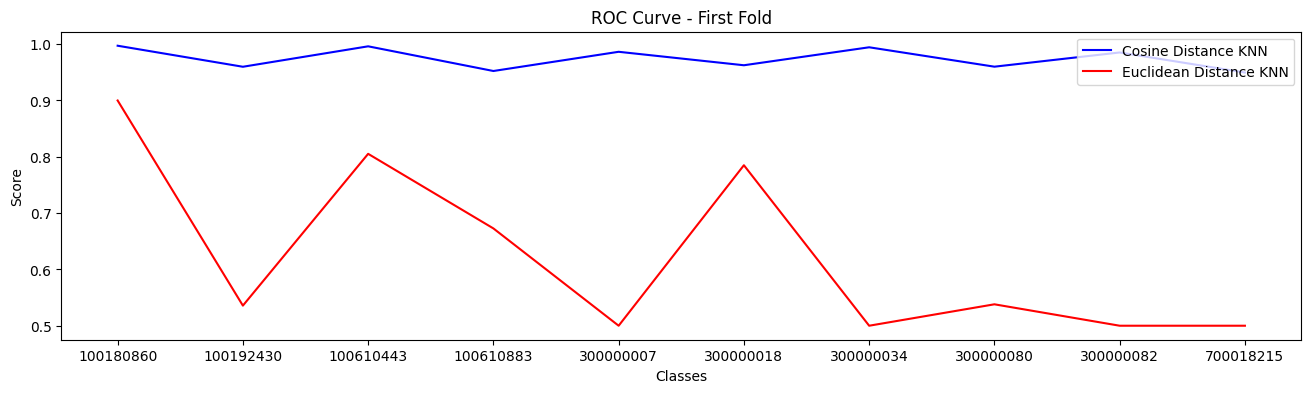

In [180]:
# Let's plot the Roc Auc Curve for the first fold (0):
fig, axes = plt.subplots(1, 1, figsize=(16, 4))
    
axes.plot(knn_cosine.classes_, cosine_roc_aucs[0].values(), color='b', label='Cosine Distance KNN')
axes.plot(knn_euclidean.classes_, euclidean_roc_aucs[0].values(), color='r', label='Euclidean Distance KNN')
axes.set_xlabel('Classes')
axes.set_ylabel('Score')
axes.set_title(f'ROC Curve - First Fold')
axes.legend(loc='upper right')
axes.set_xticks(range(len(knn_cosine.classes_)))
axes.set_xticklabels(label_encoded_dict.keys())
    
plt.show()

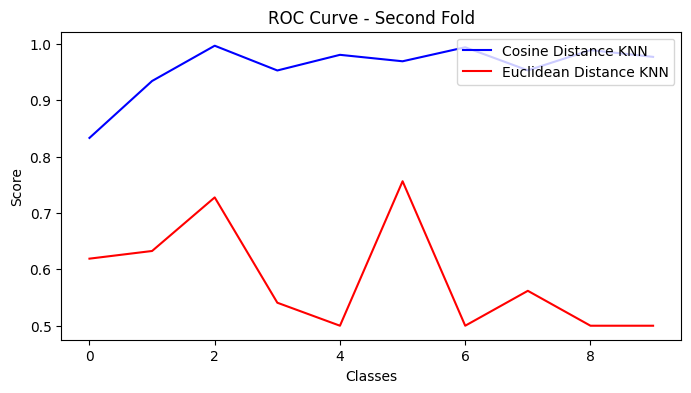

In [175]:
# Let's plot the Roc Auc Curve for the second fold (1):
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
    
axes.plot(knn_cosine.classes_, cosine_roc_aucs[1].values(), color='b', label='Cosine Distance KNN')
axes.plot(knn_euclidean.classes_, euclidean_roc_aucs[1].values(), color='r', label='Euclidean Distance KNN')
axes.set_xlabel('Classes')
axes.set_ylabel('Score')
axes.set_title(f'ROC Curve - Second Fold')
axes.legend(loc='upper right')
    
plt.show()

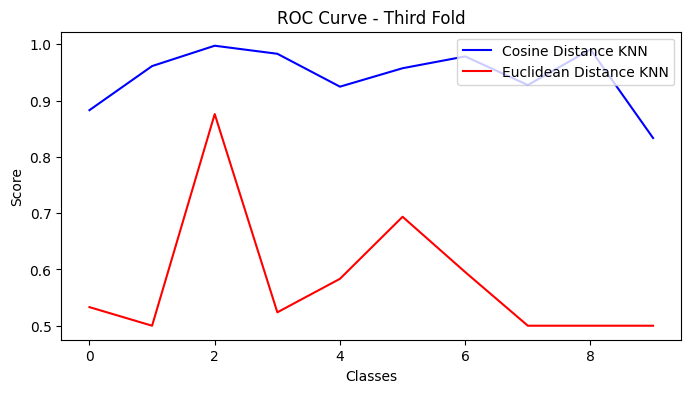

In [176]:
# Let's plot the Roc Auc Curve for the third fold (2):
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
    
axes.plot(knn_cosine.classes_, cosine_roc_aucs[2].values(), color='b', label='Cosine Distance KNN')
axes.plot(knn_euclidean.classes_, euclidean_roc_aucs[2].values(), color='r', label='Euclidean Distance KNN')
axes.set_xlabel('Classes')
axes.set_ylabel('Score')
axes.set_title(f'ROC Curve - Third Fold')
axes.legend(loc='upper right')
    
plt.show()